In [1]:
import pandas as pd

def select_highest_throughput(df1: pd.DataFrame, df2: pd.DataFrame) -> pd.DataFrame:
    """
    Groups the combined DataFrames by 'model_name', 'setting', and 'batch_size',
    and selects the row with the highest 'throughput' within each group.

    Parameters:
    - df1 (pd.DataFrame): The first DataFrame.
    - df2 (pd.DataFrame): The second DataFrame.

    Returns:
    - pd.DataFrame: The resulting DataFrame after grouping and selecting.
    """
    # Combine the two DataFrames
    combined_df = pd.concat([df1, df2], ignore_index=True)
    
    # Ensure 'throughput' is numeric
    combined_df['throughput'] = pd.to_numeric(combined_df['throughput'], errors='coerce')
    
    # Drop rows with NaN throughput values if any
    combined_df = combined_df.dropna(subset=['throughput'])
    
    # Group by the specified columns and get the index of the max throughput in each group
    idx = combined_df.groupby(['model_name', 'setting', 'batch_size'])['throughput'].idxmax()
    
    # Select the rows with the highest throughput
    result_df = combined_df.loc[idx].reset_index(drop=True)
    
    return result_df

/tmp/ipykernel_1502/1501681613.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from natsort import natsorted
%matplotlib inline
# df_results1 = pd.read_csv('results/benchmark_results_batchfirst1.csv')
# df_results2 = pd.read_csv('results/benchmark_results_batchfirst0.csv')
# df_results = pd.read_csv('results/benchmark_results_pgru.csv')
# df_results1 = pd.read_csv('results/train_benchmark_results_batchfirst0.csv')
# df_results2 = pd.read_csv('results/train_benchmark_results_batchfirst1.csv')
df_results = pd.read_csv('train_benchmark_results_batchfirst1.csv')
# df_results = select_highest_throughput(df_results1, df_results2)

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

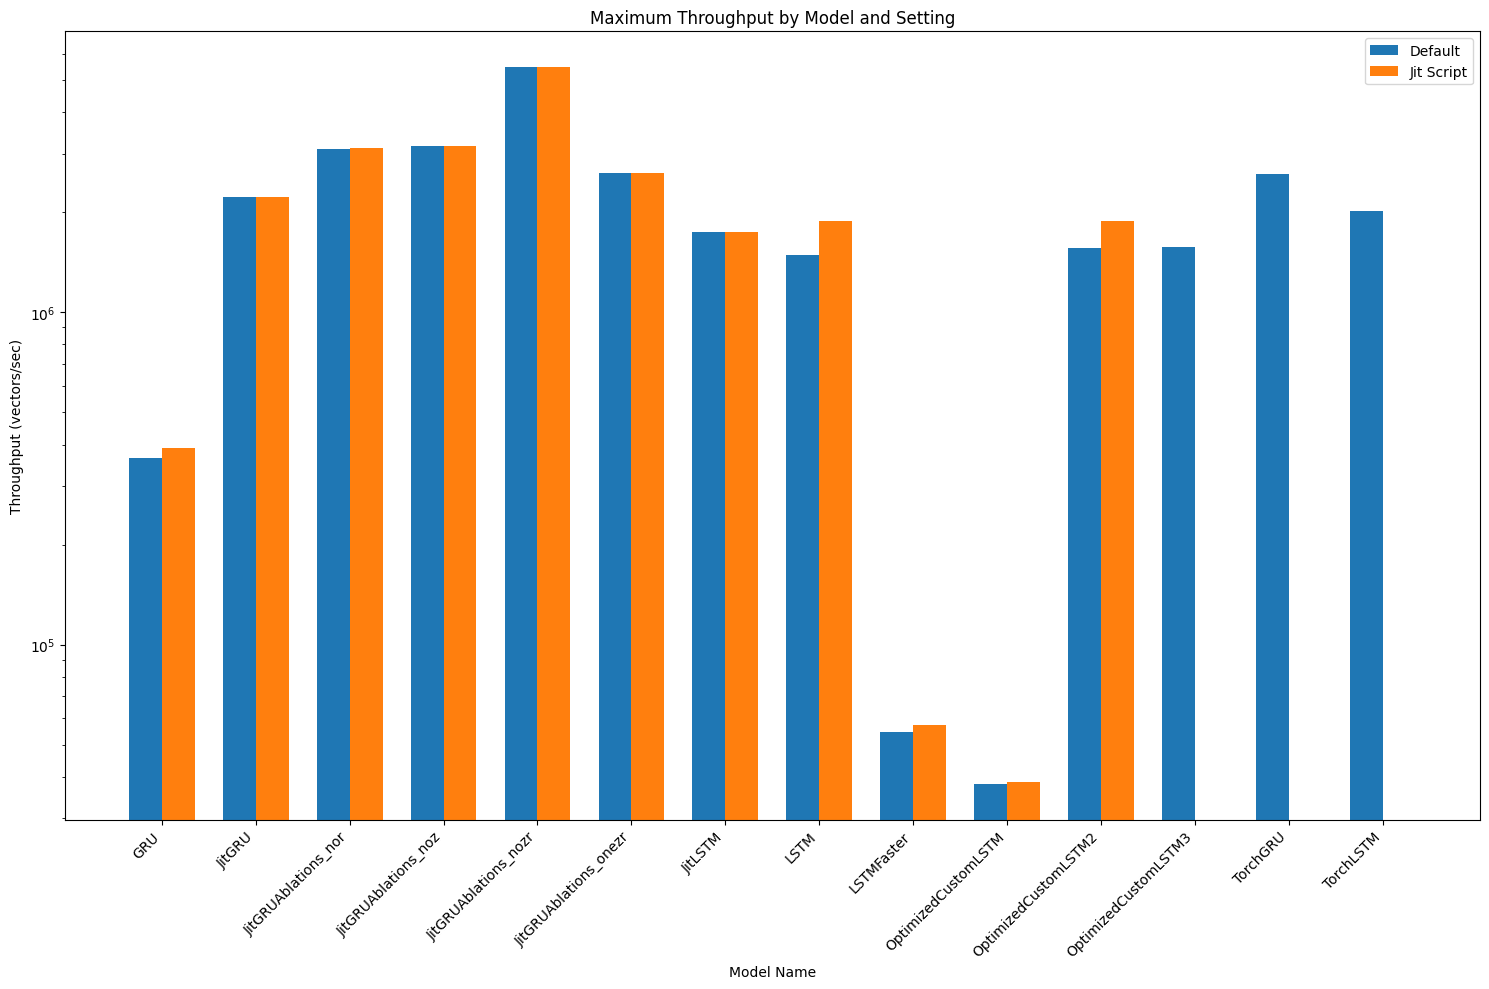

In [7]:

settings_of_interest = [
    'default',
    'jit_script',
    'compile_default',
    'compile_cudagraphs'
]
df_filtered = df_results[df_results['setting'].isin(settings_of_interest)]
df_max_throughput = df_filtered.groupby(['model_name', 'setting'])['throughput'].max().reset_index()
unique_models = natsorted(df_max_throughput['model_name'].unique())
throughput_default = []
throughput_jit_script = []
for model in unique_models:
    subset = df_max_throughput[df_max_throughput['model_name'] == model]
    default_val = subset[subset['setting'] == 'default']['throughput'].values
    jit_val = subset[subset['setting'] == 'jit_script']['throughput'].values
    throughput_default.append(default_val[0] if len(default_val) > 0 else 0)
    throughput_jit_script.append(jit_val[0] if len(jit_val) > 0 else 0)
    plt.figure(figsize=(15, 10))
bar_width = 0.35
index = range(len(unique_models))

plt.bar(index, throughput_default, bar_width, label='Default')
plt.bar([i + bar_width for i in index], throughput_jit_script, bar_width, label='Jit Script')

plt.xlabel('Model Name')
plt.ylabel('Throughput (vectors/sec)')
plt.title('Maximum Throughput by Model and Setting')

plt.xticks([i + bar_width / 2 for i in index], unique_models, rotation=45, ha='right')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from natsort import natsorted

# Assuming df_results is your DataFrame

# Settings of interest
settings_of_interest = [
    'default',
    'jit_script',
    'compile_default',
    'compile_cudagraphs'
]

# Filter the results
df_filtered = df_results[df_results['setting'].isin(settings_of_interest)]

# Get the maximum throughput per model and setting
df_max_throughput = df_filtered.groupby(['model_name', 'setting'])['throughput'].max().reset_index()

# Get unique model names
unique_models = natsorted(df_max_throughput['model_name'].unique())

# Print all model names with indices
print("Available models:")
for idx, model in enumerate(unique_models):
    print(f"{idx}: {model}")

# Allow the user to provide a list of indices to select models and their order
# For example:
selected_indices = [0, 2, 4]  # Indices of the models you want to include
selected_models = [unique_models[i] for i in selected_indices]

# Allow the user to provide a dictionary to change displayed model names
# For example:
name_mapping = {
    'model1': 'Model One',
    'model3': 'Model Three',
    'model5': 'Model Five'
}

# Prepare data for plotting
throughput_default = []
throughput_jit_script = []
model_names_with_mappings = []

for model in selected_models:
    subset = df_max_throughput[df_max_throughput['model_name'] == model]
    default_val = subset[subset['setting'] == 'default']['throughput'].values
    jit_val = subset[subset['setting'] == 'jit_script']['throughput'].values
    throughput_default.append(default_val[0] if len(default_val) > 0 else 0)
    throughput_jit_script.append(jit_val[0] if len(jit_val) > 0 else 0)
    # Apply name mapping
    display_name = name_mapping.get(model, model)
    model_names_with_mappings.append(display_name)

# Plotting
plt.figure(figsize=(7, 3))
bar_height = 0.35
index = np.arange(len(selected_models))

y_positions_default = index - bar_height / 2
y_positions_jit_script = index + bar_height / 2

# Plot default bars
bars_default = plt.barh(
    y_positions_default,
    throughput_default,
    bar_height,
    label='Default'
)

# Plot non-default bars with light blue color
bars_jit_script = plt.barh(
    y_positions_jit_script,
    throughput_jit_script,
    bar_height,
    label='Jit Script',
    color='lightblue'
)

# Set y-ticks
plt.yticks(index, model_names_with_mappings)

plt.xlabel('Throughput (vectors/sec)')
plt.ylabel('Model Name')
plt.title('Maximum Throughput by Model and Setting')

plt.xscale('log')
plt.legend()
plt.tight_layout()

# number = 1234567890
# formatted_number = "{:,}".format(number)
# print(formatted_number)  # Output: 1,234,567,890


# Annotate bars with throughput values inside the bars
for bar in bars_default:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    plt.text(
        width * 0.9,
        y,
        f'{width:.2f}',
        va='center',
        ha='right',
        color='white'
    )

for bar in bars_jit_script:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    plt.text(
        width * 0.9,
        y,
        f'{width:.2f}',
        va='center',
        ha='right',
        color='white'
    )

plt.show()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (4095740150.py, line 107)